<img src='https://upload.wikimedia.org/wikipedia/fr/thumb/e/ed/Logo_Universit%C3%A9_du_Maine.svg/1280px-Logo_Universit%C3%A9_du_Maine.svg.png' width="300" height="500">
<br>
<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Infrastructures pour l'IA</h1>
    <p style='text-align: center;'>Master Informatique 1</p>
    <p style='text-align: center;'>Anhony Larcher</p>
</div>

Ce TP est une introduction à Pandas

Le package python Pandas est extrêmement utilisé par les data scientists pour analyser les données. 

Le nom **Pandas** provient de "Panel data", un terme qui correspond à l'observation de séries temporelles de données.

## À quoi sert Pandas?

Pandas peut être utilisé pour un très grand nombre de tâches qui ne peuvent pas être listées ici.

Pandas est utilisé pour nettoyer, transformer et analyser vos données.

Supposez que vous avez un jeu de données stocké dans un fichier csv sur votre machine.

Pandas peut charger ces données et les stocker dans une structure dédiée: une **DataFrame** qui est le coeur de Pandas et permet par exemple:

- de calculer les statistiques sur ces données 
- derépondre à des questions sur les données comme par exemple:

    - quel est la moyenne, la medianne, le max, le min de chaque colonne
    - quel est la corrélation entre deux colonnes?
    - Quelle est la distribution d'une colonne?

- de nettoyer les données pour supprimer des données manquantes, filtrer des lignes ou des colonnes selon des critères variés.

- de visdualiser les données avec Matplotlib, tracer des histogrammes ou autres

- de stocker et nettoyer, transformer les donnnées et les stocker dans un nouveau fichier CSV

Pandas vous permet d'analyser vos données avant d'utiliser des algorithmes de machine learning.

## Quel place occupe pandas dans votre boite à outils?

Pandas est utilisé avec des librairies comme **NumPy**, donc de nombreuses structures de données de Numpy sont utilisées et répliquées dans Pandas. Les données utilisées dans Pandas sont souvent utilisées avec **SciPy**  et visualisées dans **Matplotlib** ou pour faire de l'apprentissage automatique avec **Scikit-Learn**.

In [1]:
import random

import pandas as pd
import numpy as np
from babel.messages.jslexer import name_re

## Au coeur de Pandas, deux structures: Series et DataFrames


Une `Series` peut être vue comme une colonne, une `DataFrame` est une structure multi-dimensionnelle, une collection de `Series`.

<img src='series-and-dataframe.png' width=600px/>

Les `DataFrames` et `Series` sont très dimilaires et de nombreuses opérations peuvent être effectuées de la même façon avec les deux.

### Créer une DataFrames à partir de rien

Il y a de nombreuses méthodes pour créer des DataFrame à partir de rien. 

La meilleure méthode est d'utiliser un dictionnaire (`dict`).

Si nous vendons des fruits, des pommes et des oranges.
Nous voulons une colonne pour chaque fruit et une ligne pour chaque client.
Pour organiser ceci comme un dictionnaire pour alimenter Pandas nous créons quelque chose comme:


In [2]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

Et nous le donnons à un constructeur Pandas

In [3]:
purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


**Comment Ca marche ?**

Chaque couple *(key, value)* dans `data` correspond à une **colonne** dans la DataFrame.

L'**Index** de cette DataFrame est donné par les nombres de 0-3, mais nous pouvons également créer notre propre index lorsqu'on initialise la DataFrame.

Utilisons le nom des clients en tant qu'index:

In [4]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


Nous pouvons donc maintenant **loc**aliser un client dans la base de données en utilisant son nom:

In [5]:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

Attention, les index ne sont pas mnipulables de la même façon que les données, il ne s'agit pas simplement d'une colonne supplémentaire; les index ont un rôle à part.

Regardons maintenant quelques méthodes pour créer des DataFrames à partir d'autres sources de données.

## Comment lire des données?

Il est facile de lire des données à partir de nombreux formats de fichiers et de les charger dans une base de données.
Chargons maintenant nos données à partir de ces fichiers.

### Lire des fichiers CSV

Lire les CSV est très simple, et se fait en une ligne:

In [6]:
df = pd.read_csv('purchases.csv')

df

,Unnamed: 0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


Il est possible de lire des CVS avec séparateurs différents en le spécifiant.

Les fichiers CSV n'ont pas d'index comme les DataFrame, mais il est possible de choisir la colonne du CSV pour définir les index en désignant la `index_col`.

In [9]:
df = pd.read_csv('purchases.csv', index_col=0)

df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


Nous avons choisi la colonne zéro comme index.

### Lire des fichiers JSON

Si vous utilisez des fichiers JSON, qui ressemble à un objet python `dict`, Pandas les lit simplement de la façon suivante:

In [11]:
df = pd.read_json('purchases.json')

df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


Notez que JSON utilise des index et que Pandas les a lu automatiquement.
Ouvrez le fichier `data_file.json` dans un éditeur de texte pour voir sa structure.

Pandas analyse la structure du fichier JSON pour créer une DataFrame et parfois il peut rencontrer des problèmes. Souvent il va falloir définir `orient`. Lisez la documentation:

[read_json docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html) pour voir comment utiliser cet argument.

### Lire des données à partir d'une base de données SQL

Si vous utilisez des bases de données SQL, vous devrez déjà établir une connection entre la librairie Python appropriée et ensuite utiliser Pandas.
Voici un exemple avec SQLite:

Vous devez installer `pysqlite3`


`sqlite3` est utilisé pour créer une connection entre la base de données qui peut être utilisée pour créer une DataFrame en utilisant un requette `SELECT`.

Créez d'abord une connection à SQLite:


In [12]:
import sqlite3

con = sqlite3.connect("database.db")

**Note**: si vos données sont sur un serveur PostgreSQL, MySQL, ou un autre serveur SQL, 
vous aurez besoin d'utiliser la bonne librairie Python.
Par exemple: `psycopg2` ([link](http://initd.org/psycopg/download/)) pour faire une conenction avec une base de données PostgreSQL. 

De plus, vous pouvez vous connecter à une URI de base de données.
Une documentation sur SQL est disponible ici:
[The Complete SQL Bootcamp](https://learndatasci.com/out/udemy-the-complete-sql-bootcamp/) sur Udemy

Dans notre base de données SQLite nous avons une table appelée *purchases*, et notre index est dans une colonne appelée "index". 

En passant une requette `SELECT` et notre `con` nous pouvons lire la table *purchase*:

In [30]:
df = pd.read_sql_query("SELECT * FROM purchases", con)

df

,index,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


Comme avec les CSVs, nous pouvons donner `index_col='index'`, mais il est également possible de fixer l'index a posteriori:

In [31]:
df = df.set_index('index')

df

,apples,oranges
index,,
June,3,0
Robert,2,3
Lily,0,7
David,1,2


En fait, vous pouvez utiliser `set_index()` sur *n'importe quelle* DataFrame utilisant *n'importe quelle* colonne à *n'importe quel* moment. 
Indexer des Series et DataFrames est une tâche très commune et il existe différentes manières de le faire.

### Écrire au format CSV, JSON, ou SQL

Une fois les traitements effectués, Pandas rend très simple l'écriture des données dans différents formats très communs.

In [26]:
df.to_csv('new_purchases.csv')

df.to_json('new_purchases.json')

df.to_sql('new_purchases', con)

4

Au format JSON ou CSV, il suffit de donner un nom de fichier en paramètre pour que celui-ci soit créé. Pour la base SQL, la commande ci-dessus ne crée pas de nouveau fichier mais ajouter la nouvelle base dans la base de données en stipulant l'option `con`.

Dans la suite de cet exercice nous allons importer des données et effectuer des opérations courantes dessus.

## Opérations courantes sur les DataFrames

l'API de Pandas offre des centaines de méthodes pour les `DataFrames`.

Chargeons la base de données de films IMDB pour explorer les plus courantes.

In [32]:
movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")

IMDB est chargée à partir d'un fichier CSV et les titres de films sont considérés comme index.

### Visualiser les données

La première chose à faire lorsqu'on traite des données, c'est de les visualiser afin de se faire une idée sur leur nature. 

On affiche les premières lignes de la DataFrame avec la méthode `head()`.

In [33]:
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Par défaut, `.head()` renvoie les 5 premières lignes de la DataFrame, il est cependant possible de demander un autre nombre de lignes comme `movies_df.head(3)` qui affichera les 3 premières lignes.

On peut aussi afficher les dernières lignes de la DataFrame avec la méthode `tail()` qui prend également un entier en paramètre.

In [34]:
movies_df.tail(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


Ces méthodes permettent de voir les nolms de colonnes, la nature des données et quelques exemples afin de se faire une première idée.

### Obtenir des informations sur les données

La méthode `.info()` est une des méthodes les plus utiles lorsqu'on prendr connaissance de nouvelles données.

In [35]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


`.info()` renvoie les informations essentielles à propos des données comme le nombre de lignes, de colonnes, le nombre de valeurs non nulles, le type de données par colonne et la taille de cette DataFrame en mémoire.

Dans notre exemple, certains films de la base `IMDB` n'ont pas d'information dans les colonnes `Revenue` et `Metascore`. Ce problème sera résolu un peu plus tard dans ce tutoriel.

Afficher le type de donnée est très utile car il est courant qu'au chargement, des données numériques lues à partir de fichiers texte (JSON, CSV) soient stockées dans la DataFrame comme des chaines de caractères alors que vous souhaiterez les considérer comme des valeurs numériques pour effectuer des opérations. Appeler la méthode `.info()` vous permettra de détecter ce problème dès le chargement des données.

Une autre méthode utile est la méthode `.shape` qui renvoie simplement le nombre de nombre de lignes et de colonnes de la DataFrame.

In [36]:
movies_df.shape

(1000, 11)

Notez que `.shape` ne nécessite pas de parenthèse car il s'agit d'un tuple (rows, columns).
La base de données IMDB contient 1000 lignes et 11 colonnes.

Cette méthode est très utile lorsqu'on filtre des DataFrames par ligne et colonne afin de vérifier la taille de la nouvelle DataFrame après filtrage.

### Gérer les données dupliquées

La base de données IMDB ne contient pas de données redondantes mais c'est une situation qui arrive souvent. 
Il est donc important de vérifier la présence de lignes dupliquées.

Pour tester, nous allons doubler la base de données en l'ajoutant à elle même:

In [54]:
temp_df = pd.concat([movies_df, movies_df])

temp_df.shape

(2000, 11)

La méthode `append()` renvoie une copie de la DataFrame mais ne modifie pas l'originale.
Nous conservons donc cette copie dans la variable `temp`.

La sortie de `.shape` montre que le nombre de ligne a été doublé.
Notice call `.shape` quickly proves our DataFrame rows have doubled.

Maintenant suprimons les données redondantes:

In [55]:
temp_df2 = temp_df.drop_duplicates()

temp_df2.shape

(1000, 11)

In [56]:
temp_df.shape

(2000, 11)

Comme la méthode `append()`, `drop_duplicates()` renvoie une copie de la DataFrame d'entrée sans les lignes dupliquées. 

`.shape` confirme la réduction du nombre de lignes.

Dans l'exemple ci-dessus, nous assignons la nouvelle DataFrame dans la même variable.

Afin de réduire le code, Pandas permet de modifier directement la DataFrame d'entrée en utilisant l'option `inplace=True` comme suit:

In [57]:
temp_df.drop_duplicates(inplace=True)

In [58]:
temp_df.shape

(1000, 11)

Maintenant, `temp_df` est modifié directement.

Une autre option importante de `drop_duplicates()` est le paramètre `keep`, qui peut prendre trois valeurs:

* `first`: (défaut) supprime les données dupliquées en conservant leur première occurrence.
* `last`: supprime les données dupliquées en conservant leur dernière occurrence.
* `False`: supprime toutes les données dupliquées

Comme nous n'avions pas défini explicitement le paramètre `keep` dans l'exemple précédent, la valeur par défaut est `first`.

Si `keep`a la valeur `False` alors toutes les valeurs dupliquées vont ête supprimées comme ci-dessous:

In [62]:
temp_df = pd.concat([movies_df, movies_df])  # make a new copy

temp_df.drop_duplicates(inplace=True, keep=False)

temp_df

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,


Comme toutes les lignes de notre DataFrame était en double, `keep=False` les supprime toutes. 
Un des intérêts de cette méthode est de localiser toutes les lignes dupliquées dans un jeu de données pour ensuite faire une sélection conditionnelle.

### Nettoyer les colonnes

Il est courant que les noms de colonnes des jeux de données contiennent des symboles, des minuscules/majuscules incohérentes, des espaces ou des typos.

Afin de sélectionner les données par colonne il est plus aisé de nettoyer les noms de colonnes.

Voici comme afficher les noms de colonnes d'une DataFrame:

In [63]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

`columns` est utile pour renommer les colonnes et renvoie une `Key Error` si l'on sélectionne une colonne qui n'existe pas.

Pour renommer une colonne, on utilise la méthode `.rename()` avec un dictionnaire en entrée.
Afin de supprimer les parenthèses dans le nom de colonnes de IMDB nous utilisons:

In [64]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)

movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

Si nous souhaitons convertir les noms de colonnes en minuscules, au lieu d'utiliser la méthode `rename()`il est également possible d'assigner une liste de noms comme suit:

In [65]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']


movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

Mais écrire le nom de toutes les colonnes est fastidieux et on peut alors utiliser une boucle comme dans l'exemple ci-dessous:

In [66]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

`list` (et `dict`) sont très pratiques pour travailler avec Pandas.

Il est recommandé d'utiliser des noms de colonnes en minuscules, de remplacer les espaces par des underscores et de supprimer les caractères spéciaux.

### Comment gérer des données manquantes

IL est très probable que des données soient manquantes, il est donc important de choisir la bonen valeur à assigner par défaut dans ce cas.
La plupart des applications Python utilisent `None`ou dans Numpy `numpy.nan` mais ces deux valeurs ne vont pas générer les mêmes comportements.

Il y a deux façons de gérer les valeurs manquantes:

1. Supprimer les colonnes avec des valeurs nulles
2. Remplacer les valeurs nulles par une valeur par défaut bien choisie cette technique est appelée **imputation**

Calculons le nombre de valeurs nulles dans chaque colonne de la DataFrame.

In [67]:
movies_df.isnull()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


La méthode `isnull()` renvoie une DataFrame de booléens.

Pour compter le nombre de valeurs nulles par colonne on peut utiliser une fonction de somme:

In [68]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

`.isnull()` n'est en soi pas très utile mais combinée avec d'autres méthodes comme `sum()`elle devient utile.

Nous observons donc que **128** valeurs sont manquantes dans la colonne `revenue_millions` et **64** dans `metascore`.

#### Retirer les valeurs nulles

Les Data Scientists et Data Analysts ont souvent des valeurs nulles et la décision de les retirer ou de leur assigner une valeur nulle nécessite une compréhension des données et de la tâche visée.

En principe, on recommendera de supprimer les données nulles dans le cas ou un petit nombre de données sont manquantes.

Pour ce faire on exécute simplement:

In [69]:
movies_df.dropna()  # By default, inplace=False

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Resident Evil: Afterlife,994,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
Project X,995,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0


In [70]:
movies_df

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


Cette opération va supprimer toutes les **lignes** pour lesquelles une valeur manque.
Elle renvoie une nouvelle DataFrame sans modifier l'originale. Il est possible d'utiliser l'option `ìnplace=True` afin de ne pas générer de copie.

Dans le cas de notre jeu de donénes, cette opération retire 128 lignes où `revenue_millions` est nulle et 64 lignes où `metascore` est nulle. 
Nous retirons alors de nombreuses lignes pour lesquelles seule une donnée est manquante.
Pour éviter ce gachi nous allonrs plutôt effectuer une imputation.

Au lieu de supprimer les lignes contenant des données nulles, il est également possible de supprimer la colonne avec l'option `axis=1`:

In [71]:
movies_df.dropna(axis=1)

,rank,genre,description,director,actors,year,runtime,rating,votes
Title,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699


In [ ]:
# TODO: dropna() only when there's two NA data in a row.

Dans notre exemple, cette opération retire les colonnes `revenue_millions` et `metascore`.

### Imputation

L'imputation est une méthode qui permet de conserver des données dont les valeurs sont inconnus.

Si retirer toutes les lignes pour lesquelles une valeur retire trop de données il vaut mieux changer les valeurs manquantes par des valeures utilisables comme par exemple la **moyenne** ou la **mediane** des valeurs.

Dans le cas des valeurs manquantes pour la colonne `revenue_millions`.
Nous allons sélectionner la colonne concernéé.

In [77]:
revenue = movies_df['revenue_millions']
revenue

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
                            ...  
Secret in Their Eyes          NaN
Hostel: Part II             17.54
Step Up 2: The Streets      58.01
Search Party                  NaN
Nine Lives                  19.64
Name: revenue_millions, Length: 1000, dtype: float64

La syntaxe la plus courante pour sélectionner des données dans une DataFrame, utilisée ci-dessous, utilise les crochets carrés.

Nous pouvons utiliser les noms de colonnes pour accéder aux données comme on accèderait aux données d'un dictionnaire.

Après cette commande, la variable `revenue` contient un objet `Serie` dont on peut avoir un premier aperçu ainsi:

In [74]:
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

Le formatage est différent de celui d'une DataFrame mais on trouve toujours l'index `Title`.

Comme dans une DataFrame, on peut compter les valeurs nulles dans cette série en utilisant la méthiode `isnull()`.
Comme nous avons des valeurs nulles dans cette série nous aloons les remplacer par la valeur moyenne:

In [75]:
revenue.isnull().sum()

128

In [78]:
revenue_mean = revenue.mean()

revenue_mean

82.95637614678898

Remplaçons maintenant les valeurs nulles dans la `Serie` par la moyenne en utilisant la méthode `fillna()`:

In [79]:
revenue.fillna(revenue_mean, inplace=True)

In [82]:
print(revenue.isnull().sum())
print(revenue.mean())

0
82.95637614678898


Nous avons remplacé toutes les valeurs nulles par la valeur moyenne (sans créer de nouvelle `Serie` grâce à l'option 
`inplace=True`.

En fait, vous remarquerez qu'en modifiant la variable `revenue`vous avez modifié la DataFrame `movie_df` car `revenue`n'est pas une copie mais une `vue` de la `Serie`.

Nous avons remplacé toutes les valeurs nulles par la valeur moyenne (sans créer de nouvelle `Serie` gr^ce à l'option 


We have now replaced all nulls in `revenue` with the mean of the column. Notice that by using `inplace=True` we have actually affected the original `movies_df`:

In [83]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

En terme de traitement de données et d'apprentissage automatique, remplacer toutes les valeurs nulles par une moyenne générale peut être un peu violent et affecter les performances de votre futur algorithme.

Aussi il serait peut plus fin de remplacer les valeurs nulles par une moyenne dépendant du genre de film ou du réalisateur.

Vous pourriez par exemple calculer une moyenne de revenue par genre de film et ensuite remplacer chaque valeur nulle par la moyenne correspondant au genre du film.

Pour l'instant nous allons analyser un peu plus en détails les données.

### Comprendre les données

La méthode `describe()` appliquée à une DataFrame renvoie un résumé de la distribution des données 
pour chaque variable continue.

In [84]:
movies_df.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


La méthode `.describe()` peut être utilisée sur les variables catégorielles pour afficher le nombre de lignes,
le nombre de catégories uniques, la catégorie la plus présente et la fréquence de cette catégorie:

In [85]:
movies_df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

Nous voyons ici que la colonnes `genre` possède 207 valeurs différenres que la catégorie la plus présente est
`Action/Adventure/Sci-Fi` qui apparait 50 fois

La méthode `.value_counts()` peut donner la fréquence de chaque valeur dans la colonne:

In [86]:
movies_df['genre'].value_counts() #.head(10)

genre
Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: count, Length: 207, dtype: int64

#### Relations entre des variables coninues

La méthode `.corr()` calcule la corrélation entre chaque variables continues:

In [92]:
np.number

numpy.number

In [98]:
movies_df.select_dtypes(include=np.number)
# Both do the same thing
movies_df._get_numeric_data()

,rank,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,
Guardians of the Galaxy,1,2014,121,8.1,757074,333.130000,76.0
Prometheus,2,2012,124,7.0,485820,126.460000,65.0
Split,3,2016,117,7.3,157606,138.120000,62.0
Sing,4,2016,108,7.2,60545,270.320000,59.0
Suicide Squad,5,2016,123,6.2,393727,325.020000,40.0
...,...,...,...,...,...,...,...
Secret in Their Eyes,996,2015,111,6.2,27585,82.956376,45.0
Hostel: Part II,997,2007,94,5.5,73152,17.540000,46.0
Step Up 2: The Streets,998,2008,98,6.2,70699,58.010000,50.0


In [99]:
movies_df.select_dtypes(include=np.number).corr()
# Both do the same thing
movies_df._get_numeric_data().corr()
# All of these do the same thing
movies_df.corr(numeric_only=True)

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


La matrice de corrélation est une représentation numérique des relations bi-variables dans le jeu de données

Un nombre positif signifie une corrélation positive - la valeur d'une variable augmente lorsque l'autre augmente - et un nombre négatif représente une corrélation inverse - une variable augmente lorsque l'autre diminue.

En observant la première colonne vous verrez que `votes` et `revenue_millions` ont une corrélation de 0.6.

On peut visualiser la corrélation bivariée avec une `scatterplot` (voir plus bas).

Pour plus d'informations sur le résumé, vous pouvez vous référer à [Essential Statistics for Data Science](https://www.learndatasci.com/tutorials/data-science-statistics-using-python/).

Nous allons maintenant manipuler les données.

### Slicing de DataFrame sélection et extraction

Pour aborder cette section, notez que les méthodes pour DataFrame et Series sont souvent les mêmes mais peuvent avoir différents attributs, de même les deux classes sont différentes ce qui peut induire des comportements différents.

Travaillons d'abord sur les colonnes

#### Par Colonne

Nous avons déjà vu comment extraire une colonne en utilisant des crochets carrés comme ceci:


In [106]:
genre_col = movies_df['genre']

type(genre_col)

pandas.core.series.Series

Cette syntaxe renvoie une *Series*
Pour extraire une *DataFrame* d'une seule colonne il faut passer une liste de noms de colonnes.
Ici nous voulonos extraire juste une colonne comme suit:

In [107]:
genre_col = movies_df[['genre']]

type(genre_col)

pandas.core.frame.DataFrame

Maintenant il est facile d'extraire une *DataFrame* de deux colonnes:

In [108]:
subset = movies_df[['genre', 'rating']]

subset.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


Travaillons maintenant par ligne.

#### By rows

Par ligne nous disposons de deux options:

- `.loc` - **loc**ates by name
- `.iloc`- **loc**ates by numerical **i**ndex

Souvenez-vous que les lignes sont indexées par titre de film.
Donc pour utiliser `.loc` il faut donner le titre de film:

In [111]:
prom = movies_df.loc["Prometheus"]

prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                            7.0
votes                                                          485820
revenue_millions                                               126.46
metascore                                                        65.0
Name: Prometheus, dtype: object

En utilisant `ilo` il faut par contre utiliser l'index numérique de Prometheus:

In [113]:
prom = movies_df.iloc[1]

prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                            7.0
votes                                                          485820
revenue_millions                                               126.46
metascore                                                        65.0
Name: Prometheus, dtype: object

`loc` et `iloc` peuvent être utilisées comme pour accéder à une `list` Python

Nous allons sélectionner plusieurs lignes avec Pandas.

Avec une `list`Python vous pouvrez extraire une tranche de la liste ainsi: `example_list[1:4]`. 
Nous pouvons faire la même chose avec Pandas:

In [114]:
movie_subset = movies_df.loc['Prometheus':'Sing']

movie_subset = movies_df.iloc[1:4]

movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


Il est imporant de noter que `.loc` inclus le film *Sing* dans le résultat alors qu'avec `iloc`
le film dont l'index numérique est 4 (*Suicide Squad*) n'est pas sélectionné.

Slicing avec `iloc`suit les mêmes règles que les `list` Python, l'objet situé au deuxième index n'est pas inclus.


#### Sélection conditionelle

Nous avons maintenant vu comment sélectionner des lignes ou des colonnes mais comment faire une sélection, conditionnelle?

Par exmple, nous allons filtrer la DatFrame pour ne garder que les films dirigés par Ridley Scott avec une note supérieure ou égale à 8.0.

Pour celà, nous sélectionnant une unique colonne de la DataFrame et appliquons une condition avec des bolléens.
Créons la condition:

In [118]:
condition = (movies_df['director'] == "Ridley Scott")

condition #.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
                           ...  
Secret in Their Eyes       False
Hostel: Part II            False
Step Up 2: The Streets     False
Search Party               False
Nine Lives                 False
Name: director, Length: 1000, dtype: bool

De la même façon qu'avec la méthode `isnull()`, cette méthode retourne une *Series* avec des valeurs `True`pour les films dirigés par Ridley Scott et `False` pour les autres.

Pour filtrer ces films, on applique cette *Series* à la *DataFrame*.

In [119]:
movies_df[movies_df['director'] == "Ridley Scott"] #.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


Si on souhaite sélectionner les films par rapport à une variable numérique (comme la note) nous pouvons le faire de la façon suivante:

In [120]:
movies_df[movies_df['rating'] >= 8.6].head(3)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


We can make some richer conditionals by using logical operators `|` for "or" and `&` for "and".

Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [124]:
movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


Il est bien sur possible de combiner ces conditions avec des opérateurs `and` et `or`pour obtenir la séecltion attendue:

Il faut grouper les conditions dans des parenthèses afin que Pandas sache comment les évaluer.

Utiliser la méthode `isin()`permet de racourcir la syntaxe (dans le cas de grandes listes) comme ceci:

In [125]:
movies_df[movies_df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


Maintenant sélectionnez les filmes produits entre 2005 et 2010 avec une note supérieure à 8.0°
mais dont le revenue est dans les 25 derniers percentiles.

In [129]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


Nous avons aperçu en utilisant la méthode `describe()`que le 25e percentile de revenue était d'environ 17.4.
Nous pouvons accéder à cette valeur directement en utilisant la méthode `quantile()` avec la valeur 0.25.

Vous devez obtenir la liste des 4 films qui répondent à ces critères.

## Appliquer des fonctions

Il est possible d'itérer sur une DataFrame ou une Series comme nous le ferions pour une liste.
Cependant, dans le cas de grandes bases de données, ce procédé sera très lent.

Une alternative efficace consiste à utiliser la méthode `apply()`sur notre bas de données.
Par exemple, nous allons convertir les notes supérieures ou égales à 8.0 en une chaine de caractère `good`
et les autre notes à `bad` pour ajouter cette information dans une nouvelle colonne.

Tout dabord, créons la fonction qui, étant donnée une note, détermine si la valeur est `good`ou `bad`:

In [130]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Maintenant, appliquons cette function à toute la colonne `rating` en utilisant la méthode `apply()` et créons en 
même temps la nouvelle colonne que nous appelerons `rating_category`.


In [137]:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)

movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


La méthode `apply()` traite chacune des valeurs de la colonne avec la function `rating_function` 
et renvoie le résultat dans une nouvelle *Series* qui est alors assignée dans une nouvelle colonne.

Vous pouvez utiliser une fonction anonyme ou *lambda* et obtenir le même résultat:

In [138]:
movies_df["rating_category"] = movies_df["rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')

movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


Utiliser la méthode `apply()` sera beaucoup plus rapide car Pandas tire avantage de la vectorisation.

—[Wikipedia](https://en.wikipedia.org/wiki/Vectorization)

En traitement du langage naturel (Natural Language Processing, NLP), 
le nettoyage des données est essentiel et peut coûter cher, utiliser la méthode `apply`permet de considérablement 
accélerer ce traitement.

## Introduction au tracé

Pandas est intégré nativement avec MatpLotLib, il est donc très facile de tracer des courbes ou des graphes à partir d'une
*DataFrame* ou d'une *Series*.

MatplotLib fera l'objet du projet TP mais nous pouvons voir ici quelques exemples.

In [148]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

Visualisons d'abord la corrélation entre couples de variables.
Nous n'aurons besoin que de la méthode `plot()`.

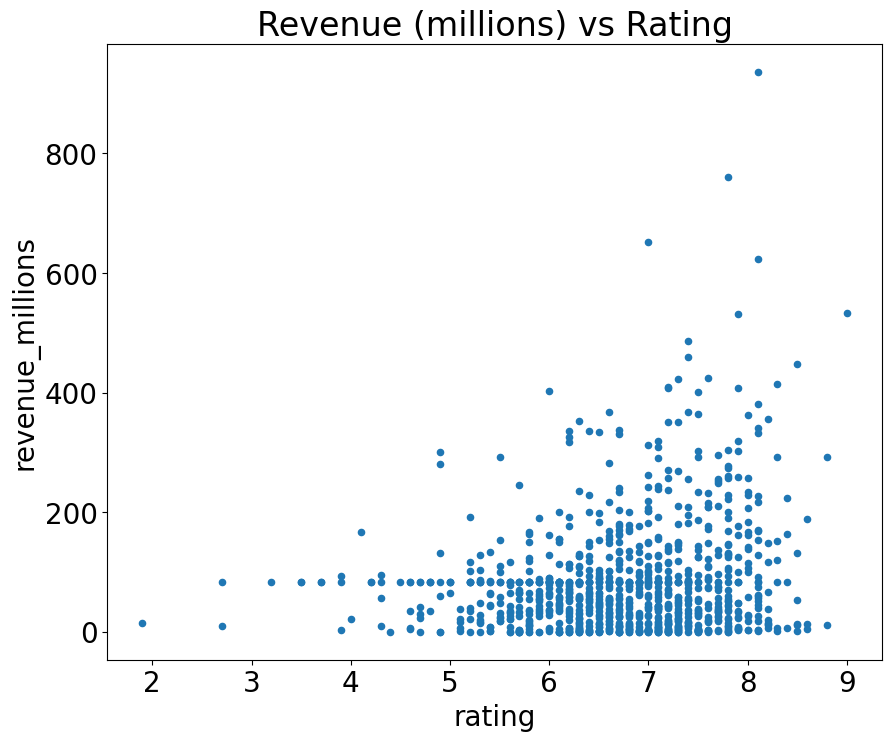

In [151]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

Le point virgule à la fin de la ligne permet d'éviter un affichage intenpestif dans le notebook jupyter (essayez sans).

Pour tracer un simple histogramme sur une colonne:

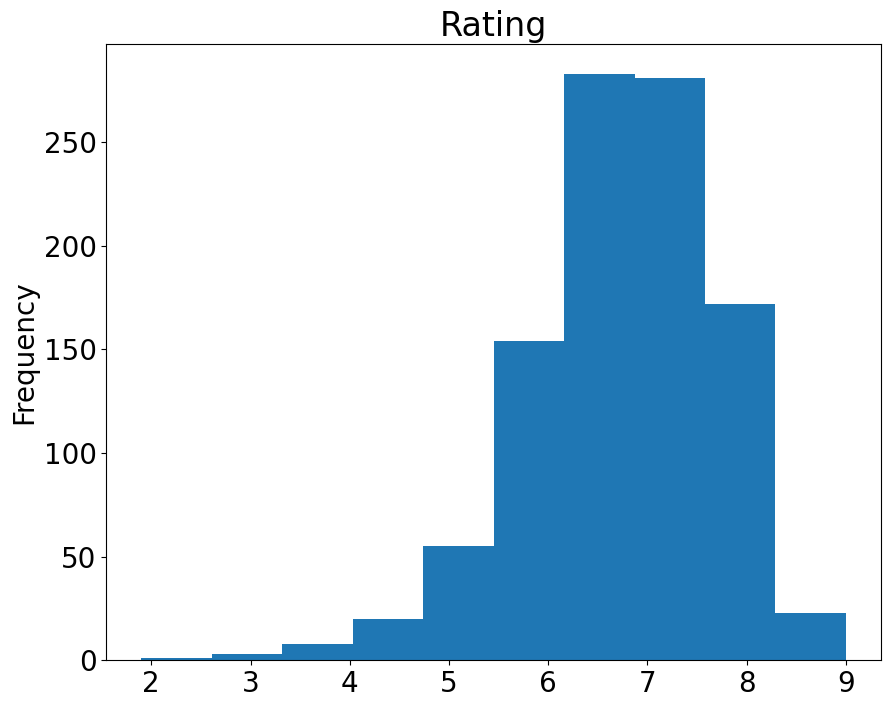

In [152]:
movies_df['rating'].plot(kind='hist', title='Rating');

Pour visualiser les informations renvoyées par la méthode `describe()` (vue plus haut) nous pouvons tracer une `boxplot`.

In [153]:
movies_df['rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64

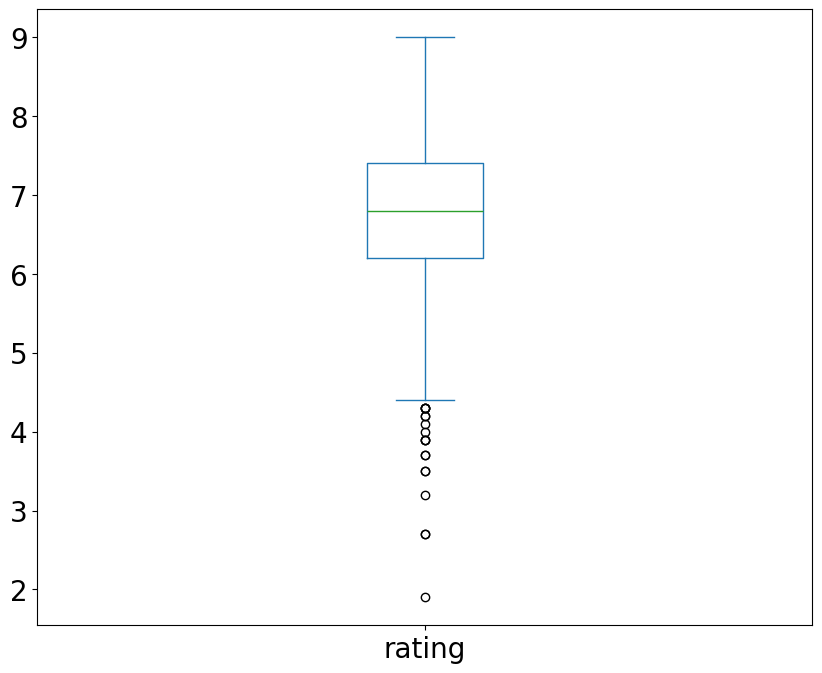

In [154]:
movies_df['rating'].plot(kind="box");

<figure>
<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif" />
    <figcaption>Source: *Flowing Data*</figcaption>
</figure>


En combinant les données catégorielles et numériques, nous pouvons créer des `BoxPlot` de revenue groupés par `rating_category` créé plus tôt:

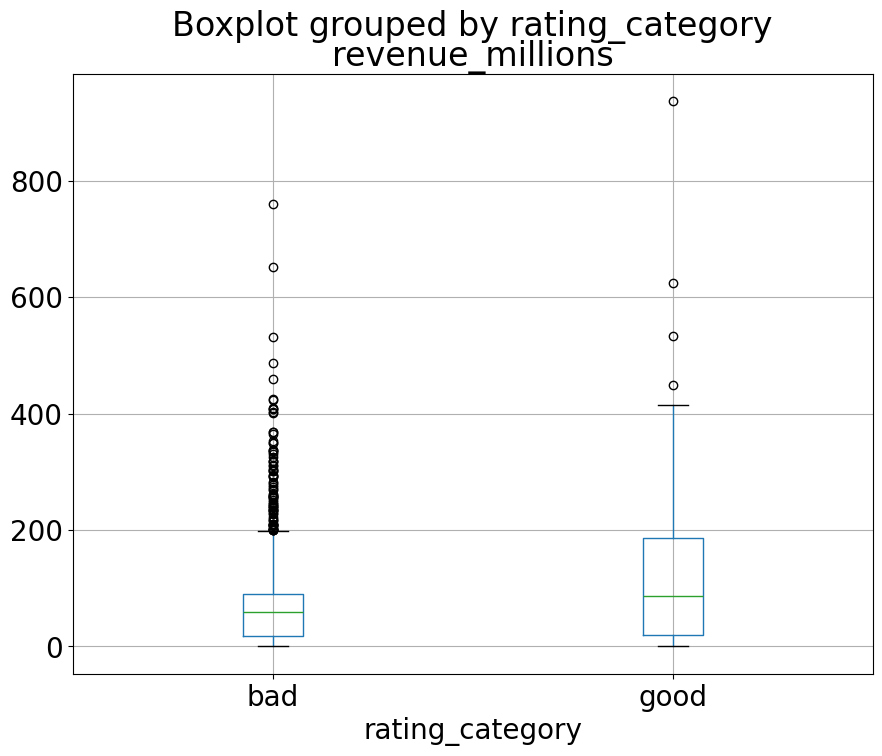

In [155]:
movies_df.boxplot(column='revenue_millions', by='rating_category');

Pandas offre de nombreuses possibilités pour visualiser les données, [plus d'info ici](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) 

## Pour aller plus loin

de nombreux autres tutoriels sont disponibles [ici](https://pandas.pydata.org/pandas-docs/stable/tutorials.html).
Des exemples concrets sont disponibles avec [Kaggle](https://www.kaggle.com/kernels).

# Exercice pratique

Vous allez maintenant réaliser une exercice utilisant 

In [291]:
# Récupérez les donnée du jeu de données IRIS et stockez les dans une Dataframe
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

In [285]:
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Centrer réduire les données

Nous voulons que pour chaque colonne de `iris` le moyenne des valeurs soit `0.0`et la variance soit `1.0`.

Comme toutes les colonnes de `iris`ne contiennent pas de valeurs numériques, il faut déjà sélectionner uniquement les 
colonnes qui peuvent être centrées réduites (donc contenant des valeurs numériques).

Pour ce faire, utilisez la méthode `select_types()` (voir doc).

In [258]:
iris.select_dtypes(include='number').mean()

Sepal_Length    5.843333
Sepal_Width     3.054000
Petal_Length    3.758667
Petal_Width     1.198667
dtype: float64

In [259]:
iris.select_dtypes(include='number').std()

Sepal_Length    0.828066
Sepal_Width     0.433594
Petal_Length    1.764420
Petal_Width     0.763161
dtype: float64

In [260]:
xm = iris.select_dtypes(include='number').mean()
xv = iris.select_dtypes(include='number').std()
iris.update(iris.select_dtypes(include='number').subtract(xm))
iris.update(iris.select_dtypes(include='number').divide(xv))

In [266]:
iris.update(iris.select_dtypes(include='number').apply(lambda x: ((x- x.mean())/x.std()) ))


In [267]:
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,-0.897674,1.028611,-1.336794,-1.308593,Iris-setosa
1,-1.139200,-0.124540,-1.336794,-1.308593,Iris-setosa
2,-1.380727,0.336720,-1.393470,-1.308593,Iris-setosa
3,-1.501490,0.106090,-1.280118,-1.308593,Iris-setosa
4,-1.018437,1.259242,-1.336794,-1.308593,Iris-setosa
...,...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121,Iris-virginica
146,0.551486,-1.277692,0.703536,0.918985,Iris-virginica
147,0.793012,-0.124540,0.816888,1.050019,Iris-virginica
148,0.430722,0.797981,0.930239,1.443121,Iris-virginica


In [268]:
iris.select_dtypes(include='number').mean()

Sepal_Length   -9.473903e-17
Sepal_Width     2.368476e-17
Petal_Length    0.000000e+00
Petal_Width     0.000000e+00
dtype: float64

In [269]:

iris.select_dtypes(include='number').std()

Sepal_Length    1.0
Sepal_Width     1.0
Petal_Length    1.0
Petal_Width     1.0
dtype: float64

Normalisez maintenant les données (centrer, réduire) et faites en sorte de modifier la *DataFrame* iris.
Vérifiez le résultat de votre traitement .

In [ ]:
# Fait ci-dessus

La fonction du module `Scipy` fait exactement ce que l'on souhaite.

Vous pouvez donc l'utiliser sur les colonnes sélectionnées.

https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/

In [299]:
from sklearn.preprocessing import StandardScaler

iris.update( pd.DataFrame( StandardScaler().fit_transform(iris.select_dtypes(include='number')), columns = col_names[:-1]) )

In [286]:
import scipy

iris.update(scipy.stats.zscore(iris.select_dtypes(include='number')))

In [300]:
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


Sélectionnez aléatoirement `S` fleurs.

Écrivez une ligne qui calcule la moyenne des `Sepal_Length` pour chaque espèce de fleur dans cet échantillon

In [315]:
S = 15
pd.concat( [iris.sample(n=S).groupby("Class")["Sepal_Length"].mean(), pd.Series({"Total":S})] )

Iris-setosa        -1.021849
Iris-versicolor     0.137901
Iris-virginica      0.957226
Total              15.000000
dtype: float64

Créez maintenant une *DataFrame* avec 4 colonnes:
* une colonne par espèce de fleur
* une colonne pour le nombre de fleurs par échantillon

Vous allez répéter maintenant 30 fois l'opération précédente pour S = [10, 30, 50, 70] afin de remplir 
cette *DataFrame*
Chaque ligne correspond à chacune des mesures. 

In [336]:
myDF = pd.DataFrame(columns=["Iris-setosa", "Iris-versicolor", "Iris-virginica", "Total"])
for i in [10, 30, 50, 70]*30:
    # Create the new row to be appended at the bottom of our DataFrame
    new_row = pd.concat( [iris.sample(n=i).groupby("Class")["Sepal_Length"].mean(), pd.Series({"Total":i})] )
    
    # Add the new row at the bottom
    myDF.loc[len(myDF)] = new_row
    
    # This was working as well but was showing working of depreciated component
    #myDF = myDF._append( new_row, ignore_index=True )
    
    # This doesn't really work for some reason (it puts NAN value everywhere and create another column)
    #myDF = pd.concat([myDF, pd.concat( [iris.sample(n=S).groupby("Class")["Sepal_Length"].mean(), pd.Series({"Total":S})] ) ])
    
myDF


,Iris-setosa,Iris-versicolor,Iris-virginica,Total
0,-1.233893,-0.052506,1.068297,10.0
1,-1.227834,0.109051,1.004959,30.0
2,-1.151672,0.109051,0.803747,50.0
3,-1.021849,0.073509,1.057137,70.0
4,-1.264185,0.916837,1.007713,10.0
...,...,...,...,...
115,-1.006703,0.083808,0.944375,70.0
116,-0.976411,NaN,1.522676,10.0
117,-0.860292,-0.106358,1.186099,30.0
118,-0.887927,0.292356,0.714890,50.0


Calculez la variance des moyennes de sepal length pour chaque taille d’échantillon

In [338]:
myDF.groupby("Total").var()

,Iris-setosa,Iris-versicolor,Iris-virginica
Total,,,
10.0,0.055629,0.133747,0.139544
30.0,0.022635,0.022046,0.063859
50.0,0.007482,0.017848,0.022645
70.0,0.003573,0.009074,0.008035


Représentez les fleurs projetées dans l’espace 2D définit par sepal length et sepal width (avec matplotlib.pyplot) Chaque espèce soit être
d’une couleur différente.

In [356]:
iris["Color"] = iris["Class"].apply(lambda x : iris["Class"].drop_duplicates().tolist().index(x) )
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class,Color
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa,0
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa,0
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa,0
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa,0
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa,0
...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica,2
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica,2
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica,2
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica,2


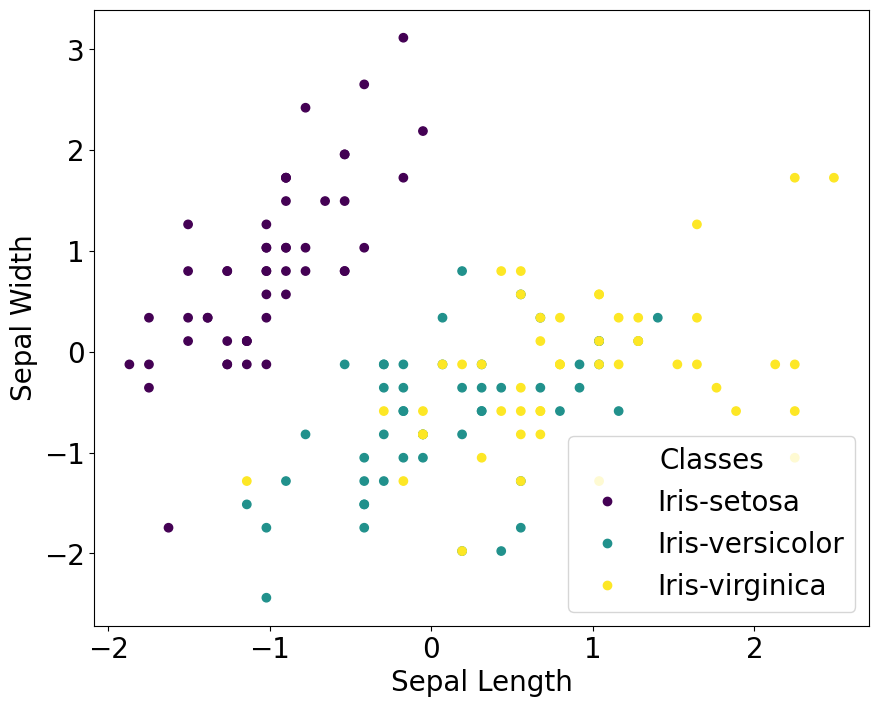

In [352]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris["Sepal_Length"], iris["Sepal_Width"], c=iris["Color"])
ax.set(xlabel="Sepal Length", ylabel="Sepal Width")
_ = ax.legend(
    scatter.legend_elements()[0], ["Iris-setosa", "Iris-versicolor", "Iris-virginica"], loc="lower right", title="Classes"
)